In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import re
import os


In [9]:
topwords_2016 = [
    "http://5.189.161.24:8080/DATA/Spon_count_exact_zeit.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_wahlsonntag.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_vergangenen.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_usa.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_t%C3%BCrkei.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_trump.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_syrien.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_spiegel.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_spd.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_regierung.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_pr%C3%A4sident.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_polizei.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_menschen.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_land.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_is.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_fl%C3%BCchtlinge.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_europa.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_eu.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_erdogan.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_deutschland.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_clinton.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_cdu.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_angaben.csv",
    "http://5.189.161.24:8080/DATA/Spon_count_exact_afd.csv"
]

In [10]:
def plot_df(df):
    _ = [df.__delitem__(col) for col in df.columns if '_relativ' in col]
    plt.style.use('ggplot')
    ax = df.plot(
        title='Der Begriff {} im Verlauf von 2001 bis 2012'.format(" und ".join(df.columns.values)))
    plt.show()

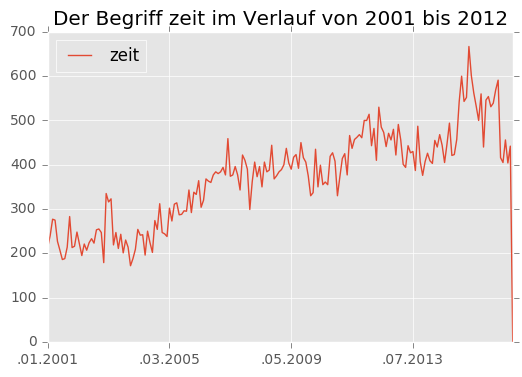

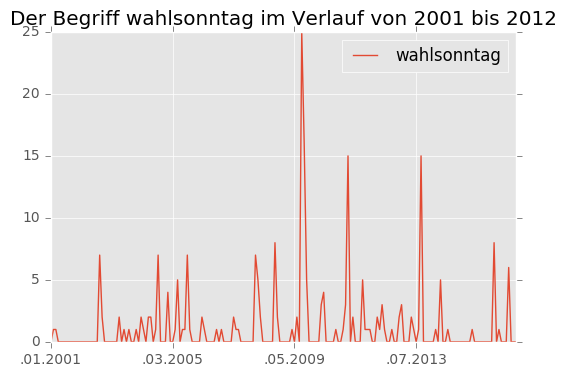

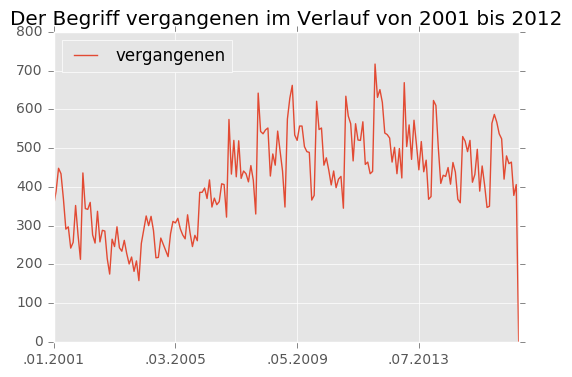

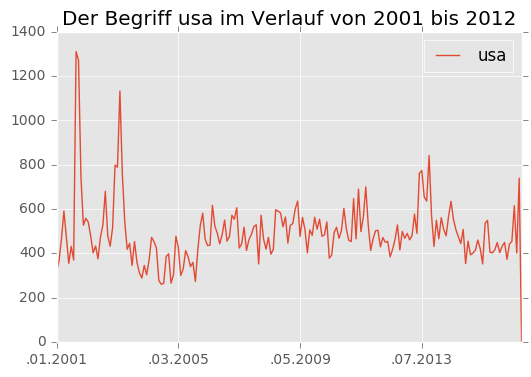

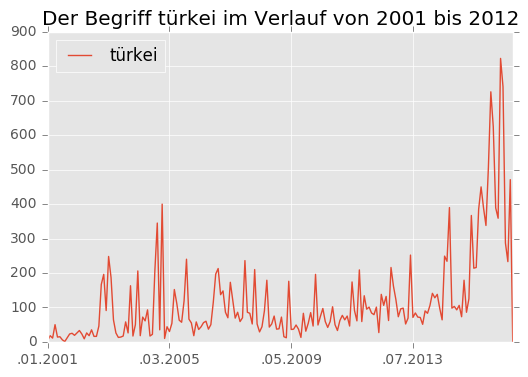

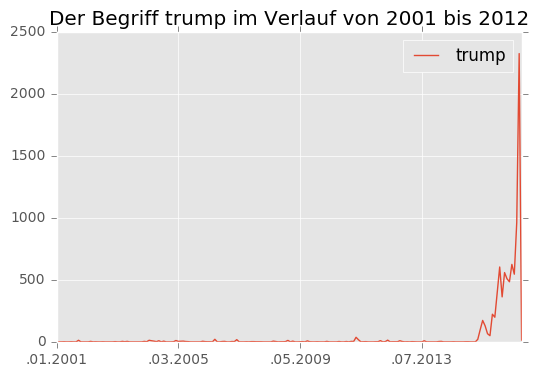

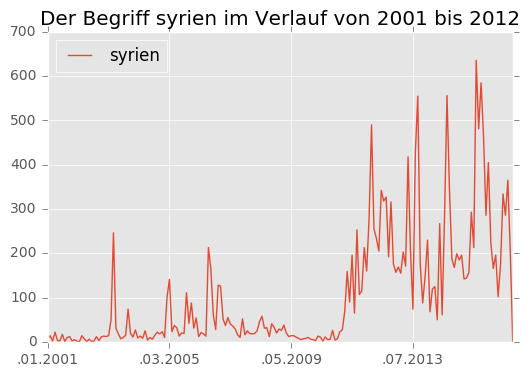

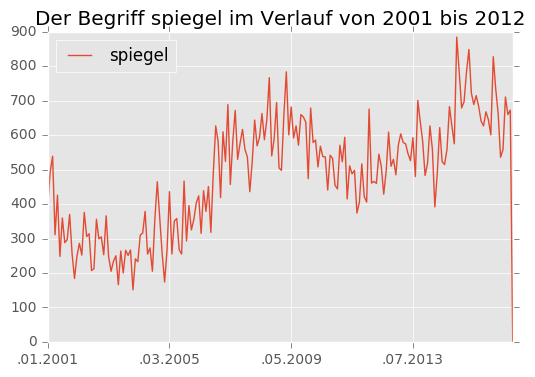

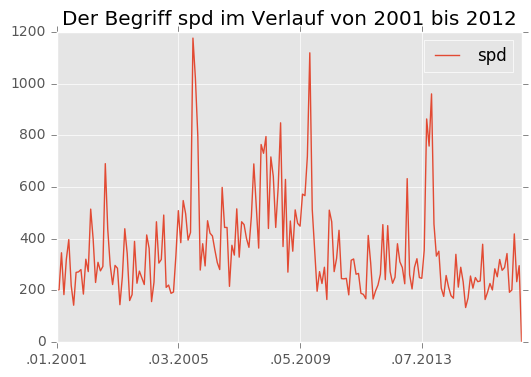

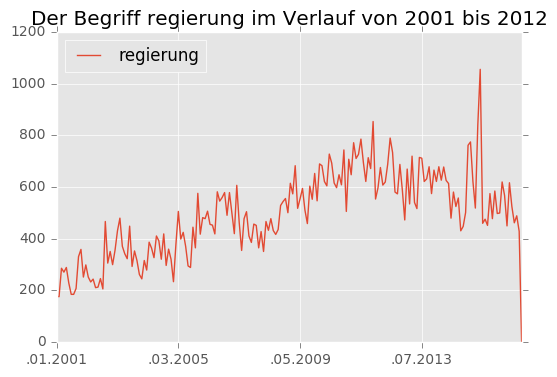

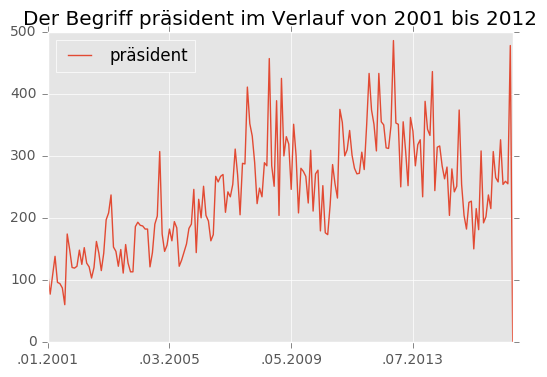

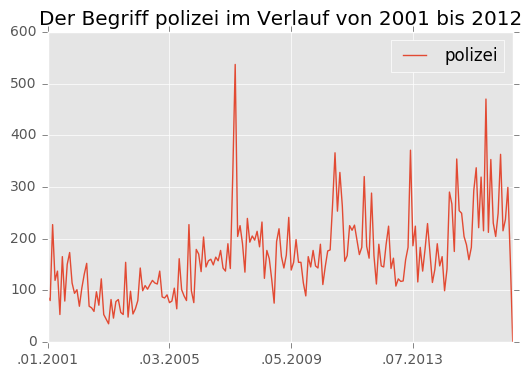

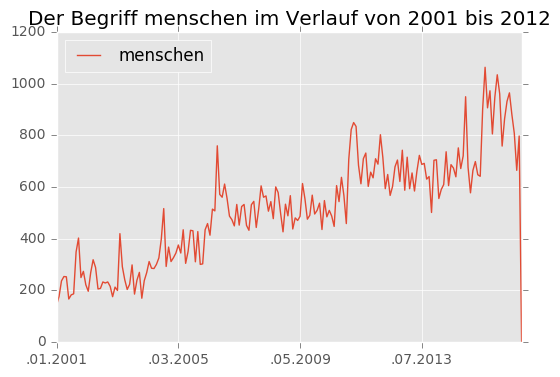

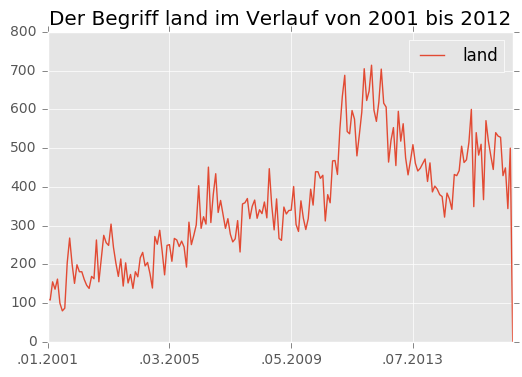

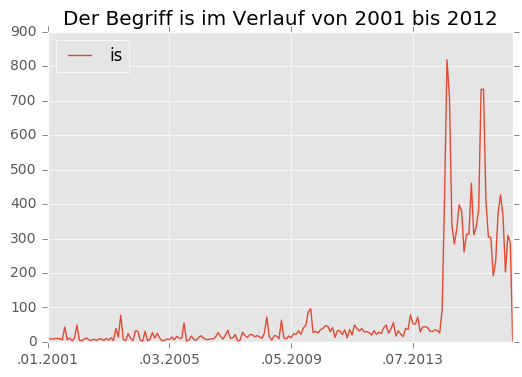

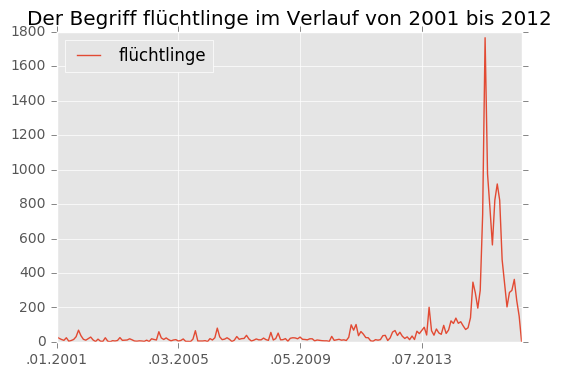

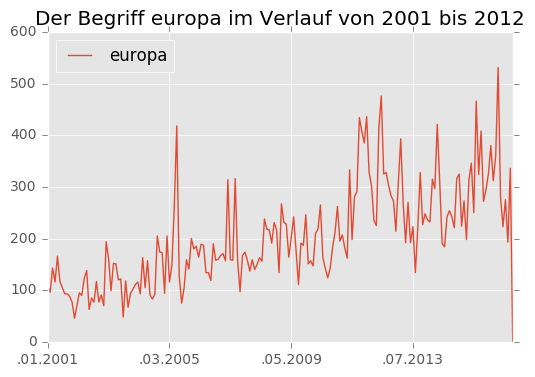

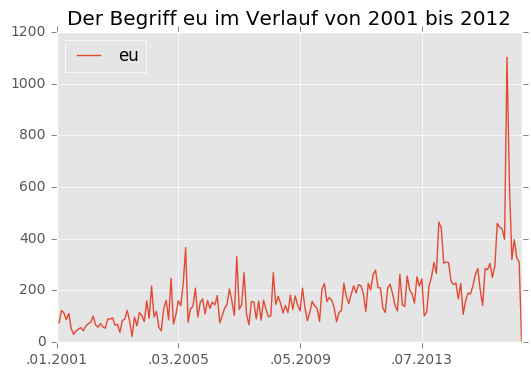

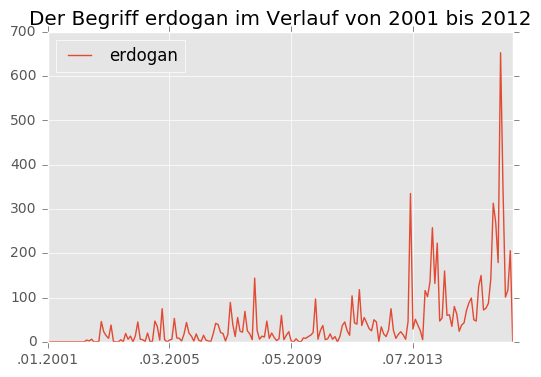

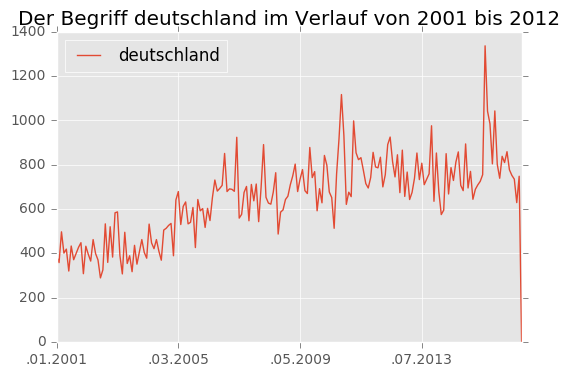

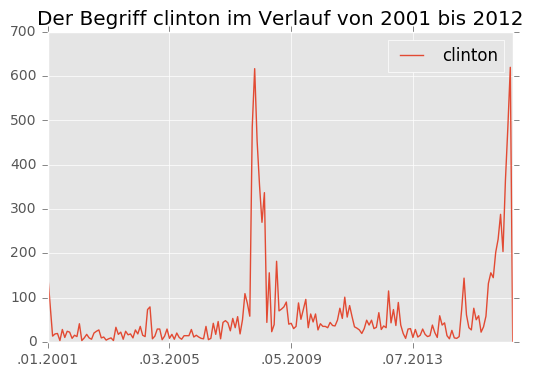

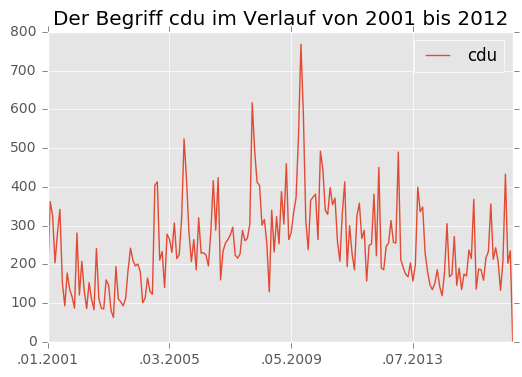

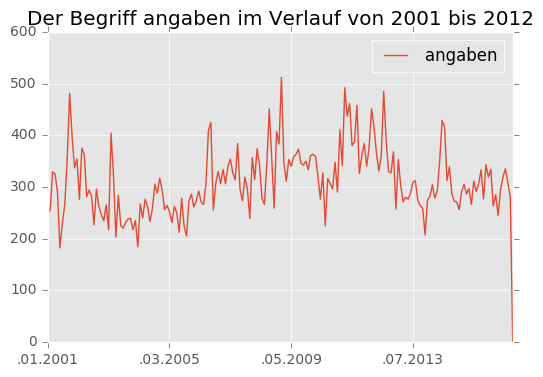

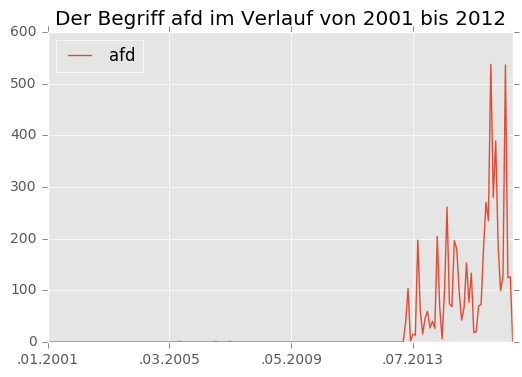

In [13]:
for word in topwords_2016:
    df = pd.DataFrame.from_csv(word, index_col=0)
    
    plot_df(df)